In [38]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
knn=KNeighborsClassifier()
scaler=StandardScaler()


In [30]:
df=pd.read_csv("Fruits.csv") #dataframe
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [31]:
X=df[['mass','width','height','color_score']] #Features
X.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [32]:
y=df[['fruit_label']] #label
y.head()

,fruit_label
0,1
1,1
2,1
3,2
4,2


In [33]:
#Training data, Test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
train_accuracies={}
test_accuracies={}
neighbors=np.arange(1,10)
for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    train_accuracies[n]=knn.score(X_train,y_train)
    test_accuracies[n]=knn.score(X_test,y_test)

c:\Users\CompuMart\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\CompuMart\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\CompuMart\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\CompuMart\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classif

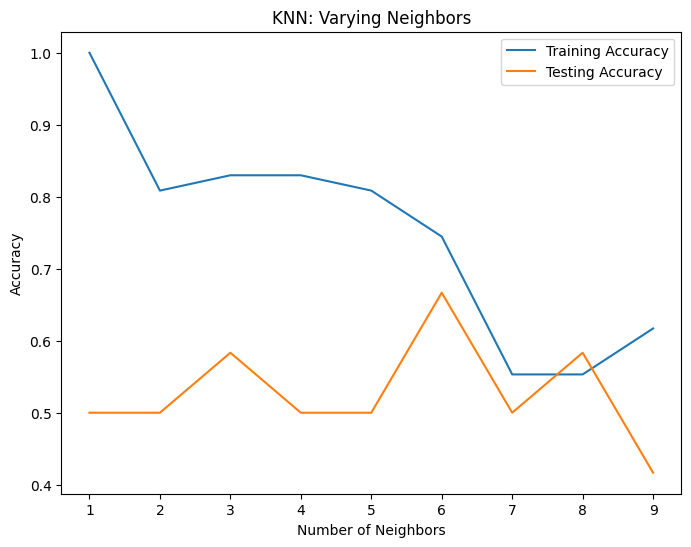

In [48]:
plt.figure(figsize=(8,6))
plt.title("KNN: Varying Neighbors")
plt.plot(neighbors, train_accuracies.values(),label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(),label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [50]:
steps=[('scaler',StandardScaler()),
       ('knn',KNeighborsClassifier(n_neighbors=6))]
pipe=Pipeline(steps)
knn_scaled=pipe.fit(X_train,y_train)
y_pred=knn_scaled.predict(X_test)
print(knn_scaled.score(X_test,y_test))

1.0


c:\Users\CompuMart\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [51]:
y_pred

array([1, 2, 3, 1, 4, 4, 4, 3, 4, 1, 4, 2], dtype=int64)

In [52]:
y_test

,fruit_label
0,1
5,2
34,3
13,1
45,4
53,4
57,4
25,3
47,4
12,1


In [54]:
print(confusion_matrix(y_test,y_pred))

[[3 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 5]]


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12

